In [34]:
# import libraries
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load in data
BRCA_phenotype = pd.read_csv("Q2/raw_data2/BRCA_phenotype.txt", 
                             delimiter = "\t")
BRCA_zscore_data = pd.read_csv("Q2/raw_data2/BRCA_zscore_data.txt", 
                             delimiter = "\t")
diagnosis = pd.read_csv("Q2/raw_data2/diagnosis.txt", 
                             delimiter = "\t")
unknown_samples = pd.read_csv("Q2/raw_data2/unknown_samples.txt", 
                             delimiter = "\t")

In [3]:
# print heads
BRCA_phenotype.head()

,sample,phenotype
0,TCGA-A7-A13G-01,Tumor
1,TCGA-A7-A13G-11,Normal
2,TCGA-AC-A23H-01,Tumor
3,TCGA-AC-A23H-11,Normal
4,TCGA-AC-A2FB-01,Tumor


In [4]:
BRCA_zscore_data.head()

,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
TCGA-A7-A13G-01,-0.160842,-0.199152,-0.199210,-0.178023,0.403693,-0.199043,-0.171499,-0.199259,-0.199331,-0.013695,...,-0.188865,-0.155668,-0.095378,-0.188938,-0.140300,0.192508,-0.104585,-0.043237,-0.180692,-0.199236
TCGA-A7-A13G-11,-0.155262,-0.157963,-0.157963,-0.137804,3.513785,-0.157819,-0.100093,-0.157214,-0.157573,-0.064936,...,-0.148156,-0.132631,-0.099427,-0.157608,-0.062089,0.176149,-0.099516,-0.097910,-0.073255,-0.157963
TCGA-AC-A23H-01,-0.218682,-0.222030,-0.221995,-0.195627,0.523498,-0.218269,-0.201505,-0.221945,-0.222030,-0.043302,...,-0.207726,-0.141028,-0.076478,-0.214239,-0.144368,0.889378,-0.135230,-0.075253,-0.215582,-0.222030
TCGA-AC-A23H-11,-0.127695,-0.132695,-0.132548,-0.123289,2.694877,-0.130617,-0.100093,-0.132542,-0.132695,-0.068073,...,-0.124151,-0.103230,-0.095971,-0.130707,-0.084362,0.502275,-0.094194,-0.046423,-0.054707,-0.132695
TCGA-AC-A2FB-01,-0.138986,-0.156675,-0.156576,-0.137551,2.251421,-0.156646,-0.129974,-0.156377,-0.156675,-0.058533,...,-0.147267,-0.124498,-0.106141,-0.154074,-0.116675,0.370197,-0.109465,-0.063451,-0.015294,-0.156675


In [5]:
unknown_samples.head()

,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,psiTPTE22,tAKR
Test1,-0.168844,-0.183873,-0.183202,-0.164613,2.864882,-0.183635,-0.149666,-0.183650,-0.183873,0.027556,...,-0.162048,-0.112985,-0.086002,-0.167872,-0.101914,0.352634,-0.074475,-0.010484,-0.149502,-0.183800
Test2,-0.147599,-0.158247,-0.158074,-0.145644,2.406447,-0.157630,-0.122270,-0.156440,-0.158247,-0.037857,...,-0.144041,-0.109650,-0.080467,-0.153564,-0.073725,0.920329,-0.063289,0.026682,-0.083169,-0.158247
Test3,-0.106310,-0.127521,-0.127663,-0.120970,0.490207,-0.120053,-0.098944,-0.127376,-0.127663,-0.011134,...,-0.120691,-0.104899,-0.061846,-0.121035,-0.101044,0.117839,-0.102104,-0.089960,-0.119337,-0.127663
Test4,-0.185481,-0.196213,-0.195851,-0.180790,3.993030,-0.185372,-0.150911,-0.195944,-0.196038,-0.071622,...,-0.179833,-0.140826,-0.121962,-0.183675,-0.094760,0.617097,-0.111203,-0.025009,-0.110236,-0.196213
Test5,-0.162520,-0.206164,-0.206164,-0.178736,1.955867,-0.206118,-0.125079,-0.205742,-0.206164,0.006152,...,-0.198740,-0.160401,-0.142092,-0.198380,-0.155385,0.755815,-0.179973,-0.115135,-0.198598,-0.206164


In [6]:
diagnosis.head()

,sample,phenotype
0,Test1,Normal
1,Test2,Tumor
2,Test3,Tumor
3,Test4,Normal
4,Test5,Tumor


## Part II: Sample classification

We provide you z-score normalized expression data of 50 breast tumor samples, 50 normal breast samples (your training and cross-validation data), and 20 samples without diagnosis (your testing data). We want to use the 100 samples with known diagnosis to train machine learning models in order to predict the 20 unknown samples. 

You will need the following libraries in R: ggplot2 and ggfortify for plotting, MASS and caret for machine learning, and pROC is for evaluating testing performance. The YouTube video on caret (https://youtu.be/z8PRU46I3NY) and the package documentation (http://topepo.github.io/caret/index.html) might be helpful.

All data for Part II are provided at /n/stat115/2021/HW2/raw_data2.

### Problem II.1

Run PCA for dimension reduction on the 100 samples with known labels, and draw these 100 samples in a 2D plot. Do cancer and normal separate from the first two PCs? Would this be sufficient to classify the unknown samples?

z-score normalized data are provided in BRCA_zscore_data.txt. Phenotype data is in BRCA_phenotype.txt.

**Answer**: We have a 100 samples (rows) and many gene variables (columns). 

In [17]:
from sklearn.preprocessing import StandardScaler

# standardize the data (python PCA doesn't do it automatically)
BRCA_zscore_data_standardized = StandardScaler().fit_transform(BRCA_zscore_data)

In [97]:
from sklearn.decomposition import PCA

# PCA
pca = PCA()
BRCA_pcs = pca.fit_transform(BRCA_zscore_data_standardized)

# converting to pandas df
BRCA_pcs = pd.DataFrame(data = BRCA_pcs,
                        columns = ["PC" + str(x+1) for x in range(BRCA_pcs.shape[1])])

In [98]:
BRCA_pcs.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100
0,-120.625194,-40.850094,39.740675,-39.560014,-50.685743,-18.276684,-17.892130,-45.183504,-33.627494,-32.581288,...,0.419676,-0.473120,0.170428,-0.045183,0.105272,-0.078576,-0.029266,-0.086673,0.052770,4.643522e-14
1,22.996449,92.358425,-15.038177,17.351937,-49.755174,21.070111,-8.005997,-4.147989,-3.205036,8.719132,...,0.886374,0.136163,-0.856261,0.567690,0.276225,0.220915,-0.389551,0.212567,-0.147223,4.643522e-14
2,-213.888969,-52.862723,6.673779,11.783784,-34.797326,-28.403063,-71.863707,94.291306,-49.388654,45.907580,...,-0.068489,-0.072511,-0.003619,-0.090429,-0.024274,-0.084794,-0.040077,0.075257,-0.051278,4.643522e-14
3,108.460345,29.116488,9.792942,6.353037,-0.674716,-11.457517,-9.162566,3.259623,10.868551,2.208774,...,-1.762725,-0.942031,1.091869,2.932593,0.983037,2.054195,3.031608,-1.745091,-1.974738,4.643522e-14
4,22.645198,-7.192325,4.627090,8.525850,-6.647696,-24.457275,10.220293,-5.663550,11.660034,16.203324,...,-0.746524,-0.550529,0.552883,0.154904,0.372340,0.361500,0.711890,0.038641,-0.163588,4.643522e-14


Making a scree plot of the principal components.

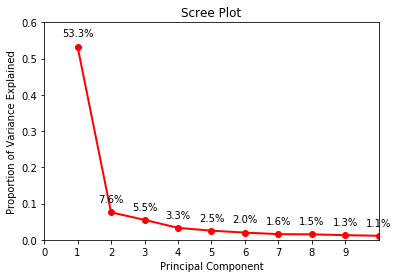

In [99]:
fig = plt.figure()
ax = fig.add_subplot(111)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.xlim([0, 10])
plt.xticks(np.arange(0, 10, 1.0))
plt.ylabel('Proportion of Variance Explained')
plt.ylim([0, 0.6])

# display PC value
for x, y in zip(PC_values[0:10], pca.explained_variance_ratio_[0:10]):

    label = "{:.1f}%".format(y*100)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    
plt.show()

Based on the scree plot, the first two principal components capture 60.9% of the variance. Now I'll make a PCA plot.

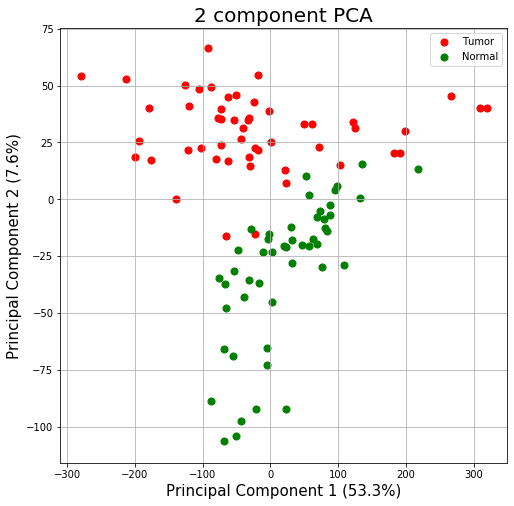

In [103]:
# PCA Plot
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1 (53.3%)', fontsize = 15)
ax.set_ylabel('Principal Component 2 (7.6%)', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['Tumor', 'Normal']
colors = ['r', 'g']
for target, color in zip(targets, colors):
    indicesToKeep = BRCA_phenotype['phenotype'] == target
    ax.scatter(BRCA_pcs.loc[indicesToKeep, 'PC1'],
               -1*BRCA_pcs.loc[indicesToKeep, 'PC2'], 
               c = color, s = 50)
    
ax.legend(targets)
ax.grid()

From the PCA graph, cancer and normal tissue seem to separate well from the first two PCs - there are visible clusters for the two types of tissues. However, normal and tumor tissue seems to have a close boundary to each other. Thus, it may not be clear which tissue type a new sample is if it falls in the boundary area between red and blue dots. Thus, I would not say this is sufficient to classify the unknown samples because there is uncertainty near the boundary area.


*Note: PCA using sklearn returns the correct variances but the values have a flipped sign compared to the version in R with prcomp (which will result in different interpretation). Read more about this here: https://stats.stackexchange.com/questions/390156/pca-principal-components-in-sklearn-not-matching-eigen-vectors-of-covariance-cal*

*I fix this issue for the plot by taking the negative of the specific PCA column to get identical results to R solutions.*

### Problem II.2

Draw a plot showing the cumulative % variance captured from the top 100 PCs. How many PCs are needed to capture 90% of the variance? 

**Answer**: I made a cumulative % variance captured plot. I would need 25 PCs to capture 90% of the variance. 

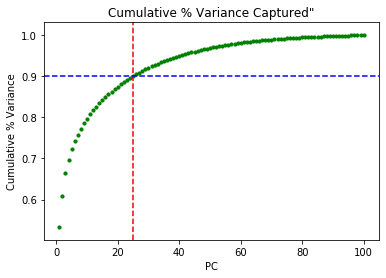

In [120]:
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt.scatter(np.arange(pca.n_components_) + 1, exp_var_cumul, 
            marker='o', s=10, color='g')
plt.title('Cumulative % Variance Captured"')
plt.xlabel('PC')
plt.ylabel('Cumulative % Variance')
plt.axvline(25, color='r', linestyle='dashed')
plt.axhline(0.9, color='b', linestyle='dashed')

### Problem II.3

Apply machine learning methods (KNN, logistic regression, Ridge regression, LASSO, ElasticNet, random forest, and support vector machines) on the top 25 PCs of the training data and 5-fold cross validation to classify the samples. caret and MASS already implemented all of the machine learning methods, including cross-validation, so calling each is only one command. In order to get consistent results from different runs, use set.seed(). 

**Answer**: The python equivalent to `caret` in `R` is `GridSearchCV` from sklearn. `GridSearchCV` allows us to try different hyperparameters and do cross validation. We do need to rescale our PCs for some of our models.

In [194]:
# import necessary functions
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import cohen_kappa_score

# set seed
seed = 215

# filter for the 25 top PCs 
x = BRCA_pcs.iloc[:, : 25].to_numpy()
y = 1*((BRCA_phenotype['phenotype'] == 'Tumor').to_numpy())

# scaled train_df
scaled_x = StandardScaler().fit_transform(train_df)

The metric I will be Euclidean distances.

In [198]:
# KNN
# need to use rescaled the data; will perform for k = 1 to 10
from sklearn.neighbors import KNeighborsClassifier

parameters = {'n_neighbors': [i for i in range(1, 11, 1)],
             'weights': ['distance'],
             'metric': ['euclidean']}
knn = GridSearchCV(KNeighborsClassifier(),
                   parameters, scoring = 'accuracy', cv = 5)
knn_results = knn.fit(x, y)

# print results
print("The best model parameters for KNN is:")
print(knn_results.best_params_)
print("with a score of: ", str(knn_results.best_score_))

The best model parameters for KNN is:
{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
with a score of:  0.9200000000000002


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
# Ridge Regression

In [ ]:
# LASSO Regression

In [ ]:
# ElasticNet Regression

In [ ]:
# Random Forest

In [ ]:
# Support Vector Machine